In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb



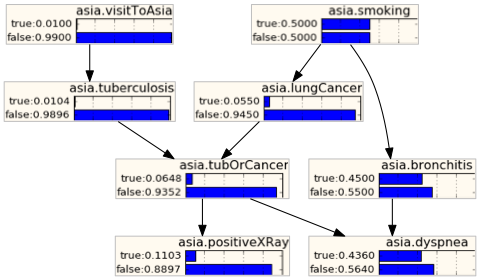

In [2]:
bn=gum.loadBN("./Asia.o3prm",verbose=False)
gnb.showBN(bn,size="3")
gnb.showInference(bn,size="5",format='png')

In [ ]:
bn=gum.loadBN("./Asia.o3prm")
gnb.showBN(bn,size="3")


In [ ]:
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size='5')
gnb.showInference(bn,size='5')


In [ ]:
bn=gum.loadBN("./Asia.o3prm")
gnb.showBN(bn,size="10")

In [ ]:
gnb.saveFigProba(bn.cpt(0),"toto.svg",format="svg")

In [ ]:
s="""
digraph structs {
  node [fillcolor=floralwhite, style=filled,color=grey];
 "asia.visitToAsia" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.visitToAsia.svg", label="", ];
 "asia.tuberculosis" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.tuberculosis.svg", label="", ];
 "asia.smoking" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.smoking.svg", label="", ];
 "asia.lungCancer" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.lungCancer.svg", label="", ];
 "asia.bronchitis" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.bronchitis.svg", label="", ];
 "asia.tubOrCancer" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.tubOrCancer.svg", label="", ];
 "asia.positiveXRay" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.positiveXRay.svg", label="", ];
 "asia.dyspnea" [shape=rectangle,image="/tmp/tmpsgu3ttylasia.dyspnea.svg", label="", ];
 "asia.tubOrCancer"->"asia.positiveXRay"; "asia.visitToAsia"->"asia.tuberculosis"; "asia.bronchitis"->"asia.dyspnea"; "asia.lungCancer"->"asia.tubOrCancer"; "asia.smoking"->"asia.lungCancer"; "asia.tubOrCancer"->"asia.dyspnea"; "asia.tuberculosis"->"asia.tubOrCancer"; "asia.smoking"->"asia.bronchitis";}
"""

In [ ]:
import pydotplus as dot


In [ ]:
from IPython.display import display,HTML,SVG

def showGraph(gr,size="4",format="png"):
  gr.set_size(size)
  if format=="svg":
    gsvg=SVG(gr.create_svg())
    print(gsvg.data)
    display(HTML("<div align='center'>"+gsvg.data+"</div>"))
  else:
    display_png(Image(format="png",data=gr.create_png()))
    

In [ ]:
showGraph(dot.graph_from_dot_data(s),format="svg")

In [ ]:
ss="""
<svg height="234pt" viewBox="0.00 0.00 288.00 233.59" width="288pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<g class="graph" id="graph0" transform="scale(0.663594 0.663594) rotate(0) translate(4 348)">
<title>structs</title>
<polygon fill="white" points="-4,4 -4,-348 430,-348 430,4 -4,4" stroke="none"/>
<!-- asia.visitToAsia -->
<g class="node" id="node1"><title>asia.visitToAsia</title>
<polygon fill="floralwhite" points="152,-344 0,-344 0,-285 152,-285 152,-344" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="0" y="-344">
 <defs>
  <style type="text/css">
*{stroke-linecap:butt;stroke-linejoin:round;stroke-miterlimit:100000;}
  </style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 76.96925 
L 199.72 76.96925 
L 199.72 0 
L 0 0 
L 0 76.96925 
z
" style="fill:none;"/>
  </g>
  <g id="axes_1">
   <g id="patch_2">
    <path d="M 78.578125 44.74175 
L 190.178125 44.74175 
L 190.178125 15.94175 
L 78.578125 15.94175 
L 78.578125 44.74175 
z
" style="fill:none;"/>
   </g>
   <g id="patch_3">
    <path clip-path="url(#p8d1f6025c0)" d="M 78.578125 44.74175 
L 189.062125 44.74175 
L 189.062125 31.94175 
L 78.578125 31.94175 
z
" style="fill:#0000ff;stroke:#000000;stroke-linejoin:miter;"/>
   </g>
   <g id="patch_4">
    <path clip-path="url(#p8d1f6025c0)" d="M 78.578125 28.74175 
L 79.694125 28.74175 
L 79.694125 15.94175 
L 78.578125 15.94175 
z
" style="fill:#0000ff;stroke:#000000;stroke-linejoin:miter;"/>
   </g>
   <g id="patch_5">
    <path d="M 78.578125 15.94175 
L 190.178125 15.94175 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;"/>
   </g>
   <g id="patch_6">
    <path d="M 78.578125 44.74175 
L 190.178125 44.74175 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;"/>
   </g>
   <g id="patch_7">
    <path d="M 78.578125 44.74175 
L 78.578125 15.94175 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;"/>
   </g>
   <g id="patch_8">
    <path d="M 190.178125 44.74175 
L 190.178125 15.94175 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;"/>
   </g>
   <g id="matplotlib.axis_1">
    <g id="xtick_1">
     <g id="line2d_1">
      <path clip-path="url(#p8d1f6025c0)" d="M 78.578125 44.74175 
L 78.578125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_2">
      <defs>
       <path d="M 0 0 
L 0 -4 
" id="m7cf8d7b8c4" style="stroke:#000000;stroke-width:0.5;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="78.578125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_3">
      <defs>
       <path d="M 0 0 
L 0 4 
" id="mc9691fded1" style="stroke:#000000;stroke-width:0.5;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="78.578125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_1">
      <!-- 0.0 -->
      <defs>
       <path d="M 31.78125 66.40625 
Q 24.171875 66.40625 20.328125 58.90625 
Q 16.5 51.421875 16.5 36.375 
Q 16.5 21.390625 20.328125 13.890625 
Q 24.171875 6.390625 31.78125 6.390625 
Q 39.453125 6.390625 43.28125 13.890625 
Q 47.125 21.390625 47.125 36.375 
Q 47.125 51.421875 43.28125 58.90625 
Q 39.453125 66.40625 31.78125 66.40625 
M 31.78125 74.21875 
Q 44.046875 74.21875 50.515625 64.515625 
Q 56.984375 54.828125 56.984375 36.375 
Q 56.984375 17.96875 50.515625 8.265625 
Q 44.046875 -1.421875 31.78125 -1.421875 
Q 19.53125 -1.421875 13.0625 8.265625 
Q 6.59375 17.96875 6.59375 36.375 
Q 6.59375 54.828125 13.0625 64.515625 
Q 19.53125 74.21875 31.78125 74.21875 
" id="BitstreamVeraSans-Roman-30"/>
       <path d="M 10.6875 12.40625 
L 21 12.40625 
L 21 0 
L 10.6875 0 
z
" id="BitstreamVeraSans-Roman-2e"/>
      </defs>
      <g transform="translate(69.03625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-30"/>
      </g>
     </g>
    </g>
    <g id="xtick_2">
     <g id="line2d_4">
      <path clip-path="url(#p8d1f6025c0)" d="M 100.898125 44.74175 
L 100.898125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_5">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="100.898125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_6">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="100.898125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_2">
      <!-- 0.2 -->
      <defs>
       <path d="M 19.1875 8.296875 
L 53.609375 8.296875 
L 53.609375 0 
L 7.328125 0 
L 7.328125 8.296875 
Q 12.9375 14.109375 22.625 23.890625 
Q 32.328125 33.6875 34.8125 36.53125 
Q 39.546875 41.84375 41.421875 45.53125 
Q 43.3125 49.21875 43.3125 52.78125 
Q 43.3125 58.59375 39.234375 62.25 
Q 35.15625 65.921875 28.609375 65.921875 
Q 23.96875 65.921875 18.8125 64.3125 
Q 13.671875 62.703125 7.8125 59.421875 
L 7.8125 69.390625 
Q 13.765625 71.78125 18.9375 73 
Q 24.125 74.21875 28.421875 74.21875 
Q 39.75 74.21875 46.484375 68.546875 
Q 53.21875 62.890625 53.21875 53.421875 
Q 53.21875 48.921875 51.53125 44.890625 
Q 49.859375 40.875 45.40625 35.40625 
Q 44.1875 33.984375 37.640625 27.21875 
Q 31.109375 20.453125 19.1875 8.296875 
" id="BitstreamVeraSans-Roman-32"/>
      </defs>
      <g transform="translate(91.35625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-32"/>
      </g>
     </g>
    </g>
    <g id="xtick_3">
     <g id="line2d_7">
      <path clip-path="url(#p8d1f6025c0)" d="M 123.218125 44.74175 
L 123.218125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_8">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="123.218125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_9">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="123.218125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_3">
      <!-- 0.4 -->
      <defs>
       <path d="M 37.796875 64.3125 
L 12.890625 25.390625 
L 37.796875 25.390625 
z
M 35.203125 72.90625 
L 47.609375 72.90625 
L 47.609375 25.390625 
L 58.015625 25.390625 
L 58.015625 17.1875 
L 47.609375 17.1875 
L 47.609375 0 
L 37.796875 0 
L 37.796875 17.1875 
L 4.890625 17.1875 
L 4.890625 26.703125 
z
" id="BitstreamVeraSans-Roman-34"/>
      </defs>
      <g transform="translate(113.67625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-34"/>
      </g>
     </g>
    </g>
    <g id="xtick_4">
     <g id="line2d_10">
      <path clip-path="url(#p8d1f6025c0)" d="M 145.538125 44.74175 
L 145.538125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_11">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="145.538125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_12">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="145.538125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_4">
      <!-- 0.6 -->
      <defs>
       <path d="M 33.015625 40.375 
Q 26.375 40.375 22.484375 35.828125 
Q 18.609375 31.296875 18.609375 23.390625 
Q 18.609375 15.53125 22.484375 10.953125 
Q 26.375 6.390625 33.015625 6.390625 
Q 39.65625 6.390625 43.53125 10.953125 
Q 47.40625 15.53125 47.40625 23.390625 
Q 47.40625 31.296875 43.53125 35.828125 
Q 39.65625 40.375 33.015625 40.375 
M 52.59375 71.296875 
L 52.59375 62.3125 
Q 48.875 64.0625 45.09375 64.984375 
Q 41.3125 65.921875 37.59375 65.921875 
Q 27.828125 65.921875 22.671875 59.328125 
Q 17.53125 52.734375 16.796875 39.40625 
Q 19.671875 43.65625 24.015625 45.921875 
Q 28.375 48.1875 33.59375 48.1875 
Q 44.578125 48.1875 50.953125 41.515625 
Q 57.328125 34.859375 57.328125 23.390625 
Q 57.328125 12.15625 50.6875 5.359375 
Q 44.046875 -1.421875 33.015625 -1.421875 
Q 20.359375 -1.421875 13.671875 8.265625 
Q 6.984375 17.96875 6.984375 36.375 
Q 6.984375 53.65625 15.1875 63.9375 
Q 23.390625 74.21875 37.203125 74.21875 
Q 40.921875 74.21875 44.703125 73.484375 
Q 48.484375 72.75 52.59375 71.296875 
" id="BitstreamVeraSans-Roman-36"/>
      </defs>
      <g transform="translate(135.99625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-36"/>
      </g>
     </g>
    </g>
    <g id="xtick_5">
     <g id="line2d_13">
      <path clip-path="url(#p8d1f6025c0)" d="M 167.858125 44.74175 
L 167.858125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_14">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="167.858125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_15">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="167.858125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_5">
      <!-- 0.8 -->
      <defs>
       <path d="M 31.78125 34.625 
Q 24.75 34.625 20.71875 30.859375 
Q 16.703125 27.09375 16.703125 20.515625 
Q 16.703125 13.921875 20.71875 10.15625 
Q 24.75 6.390625 31.78125 6.390625 
Q 38.8125 6.390625 42.859375 10.171875 
Q 46.921875 13.96875 46.921875 20.515625 
Q 46.921875 27.09375 42.890625 30.859375 
Q 38.875 34.625 31.78125 34.625 
M 21.921875 38.8125 
Q 15.578125 40.375 12.03125 44.71875 
Q 8.5 49.078125 8.5 55.328125 
Q 8.5 64.0625 14.71875 69.140625 
Q 20.953125 74.21875 31.78125 74.21875 
Q 42.671875 74.21875 48.875 69.140625 
Q 55.078125 64.0625 55.078125 55.328125 
Q 55.078125 49.078125 51.53125 44.71875 
Q 48 40.375 41.703125 38.8125 
Q 48.828125 37.15625 52.796875 32.3125 
Q 56.78125 27.484375 56.78125 20.515625 
Q 56.78125 9.90625 50.3125 4.234375 
Q 43.84375 -1.421875 31.78125 -1.421875 
Q 19.734375 -1.421875 13.25 4.234375 
Q 6.78125 9.90625 6.78125 20.515625 
Q 6.78125 27.484375 10.78125 32.3125 
Q 14.796875 37.15625 21.921875 38.8125 
M 18.3125 54.390625 
Q 18.3125 48.734375 21.84375 45.5625 
Q 25.390625 42.390625 31.78125 42.390625 
Q 38.140625 42.390625 41.71875 45.5625 
Q 45.3125 48.734375 45.3125 54.390625 
Q 45.3125 60.0625 41.71875 63.234375 
Q 38.140625 66.40625 31.78125 66.40625 
Q 25.390625 66.40625 21.84375 63.234375 
Q 18.3125 60.0625 18.3125 54.390625 
" id="BitstreamVeraSans-Roman-38"/>
      </defs>
      <g transform="translate(158.31625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-38"/>
      </g>
     </g>
    </g>
    <g id="xtick_6">
     <g id="line2d_16">
      <path clip-path="url(#p8d1f6025c0)" d="M 190.178125 44.74175 
L 190.178125 15.94175 
" style="fill:none;stroke:#000000;stroke-dasharray:1.000000,3.000000;stroke-dashoffset:0.0;stroke-width:0.5;"/>
     </g>
     <g id="line2d_17">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="190.178125" xlink:href="#m7cf8d7b8c4" y="44.74175"/>
      </g>
     </g>
     <g id="line2d_18">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="190.178125" xlink:href="#mc9691fded1" y="15.94175"/>
      </g>
     </g>
     <g id="text_6">
      <!-- 1.0 -->
      <defs>
       <path d="M 12.40625 8.296875 
L 28.515625 8.296875 
L 28.515625 63.921875 
L 10.984375 60.40625 
L 10.984375 69.390625 
L 28.421875 72.90625 
L 38.28125 72.90625 
L 38.28125 8.296875 
L 54.390625 8.296875 
L 54.390625 0 
L 12.40625 0 
z
" id="BitstreamVeraSans-Roman-31"/>
      </defs>
      <g transform="translate(180.63625 57.859875)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-31"/>
       <use x="63.623046875" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="95.41015625" xlink:href="#BitstreamVeraSans-Roman-30"/>
      </g>
     </g>
    </g>
    <g id="text_7">
     <!-- Probability -->
     <defs>
      <path d="M 9.421875 75.984375 
L 18.40625 75.984375 
L 18.40625 0 
L 9.421875 0 
z
" id="BitstreamVeraSans-Roman-6c"/>
      <path d="M 41.109375 46.296875 
Q 39.59375 47.171875 37.8125 47.578125 
Q 36.03125 48 33.890625 48 
Q 26.265625 48 22.1875 43.046875 
Q 18.109375 38.09375 18.109375 28.8125 
L 18.109375 0 
L 9.078125 0 
L 9.078125 54.6875 
L 18.109375 54.6875 
L 18.109375 46.1875 
Q 20.953125 51.171875 25.484375 53.578125 
Q 30.03125 56 36.53125 56 
Q 37.453125 56 38.578125 55.875 
Q 39.703125 55.765625 41.0625 55.515625 
z
" id="BitstreamVeraSans-Roman-72"/>
      <path d="M 48.6875 27.296875 
Q 48.6875 37.203125 44.609375 42.84375 
Q 40.53125 48.484375 33.40625 48.484375 
Q 26.265625 48.484375 22.1875 42.84375 
Q 18.109375 37.203125 18.109375 27.296875 
Q 18.109375 17.390625 22.1875 11.75 
Q 26.265625 6.109375 33.40625 6.109375 
Q 40.53125 6.109375 44.609375 11.75 
Q 48.6875 17.390625 48.6875 27.296875 
M 18.109375 46.390625 
Q 20.953125 51.265625 25.265625 53.625 
Q 29.59375 56 35.59375 56 
Q 45.5625 56 51.78125 48.09375 
Q 58.015625 40.1875 58.015625 27.296875 
Q 58.015625 14.40625 51.78125 6.484375 
Q 45.5625 -1.421875 35.59375 -1.421875 
Q 29.59375 -1.421875 25.265625 0.953125 
Q 20.953125 3.328125 18.109375 8.203125 
L 18.109375 0 
L 9.078125 0 
L 9.078125 75.984375 
L 18.109375 75.984375 
z
" id="BitstreamVeraSans-Roman-62"/>
      <path d="M 34.28125 27.484375 
Q 23.390625 27.484375 19.1875 25 
Q 14.984375 22.515625 14.984375 16.5 
Q 14.984375 11.71875 18.140625 8.90625 
Q 21.296875 6.109375 26.703125 6.109375 
Q 34.1875 6.109375 38.703125 11.40625 
Q 43.21875 16.703125 43.21875 25.484375 
L 43.21875 27.484375 
z
M 52.203125 31.203125 
L 52.203125 0 
L 43.21875 0 
L 43.21875 8.296875 
Q 40.140625 3.328125 35.546875 0.953125 
Q 30.953125 -1.421875 24.3125 -1.421875 
Q 15.921875 -1.421875 10.953125 3.296875 
Q 6 8.015625 6 15.921875 
Q 6 25.140625 12.171875 29.828125 
Q 18.359375 34.515625 30.609375 34.515625 
L 43.21875 34.515625 
L 43.21875 35.40625 
Q 43.21875 41.609375 39.140625 45 
Q 35.0625 48.390625 27.6875 48.390625 
Q 23 48.390625 18.546875 47.265625 
Q 14.109375 46.140625 10.015625 43.890625 
L 10.015625 52.203125 
Q 14.9375 54.109375 19.578125 55.046875 
Q 24.21875 56 28.609375 56 
Q 40.484375 56 46.34375 49.84375 
Q 52.203125 43.703125 52.203125 31.203125 
" id="BitstreamVeraSans-Roman-61"/>
      <path d="M 19.671875 64.796875 
L 19.671875 37.40625 
L 32.078125 37.40625 
Q 38.96875 37.40625 42.71875 40.96875 
Q 46.484375 44.53125 46.484375 51.125 
Q 46.484375 57.671875 42.71875 61.234375 
Q 38.96875 64.796875 32.078125 64.796875 
z
M 9.8125 72.90625 
L 32.078125 72.90625 
Q 44.34375 72.90625 50.609375 67.359375 
Q 56.890625 61.8125 56.890625 51.125 
Q 56.890625 40.328125 50.609375 34.8125 
Q 44.34375 29.296875 32.078125 29.296875 
L 19.671875 29.296875 
L 19.671875 0 
L 9.8125 0 
z
" id="BitstreamVeraSans-Roman-50"/>
      <path d="M 32.171875 -5.078125 
Q 28.375 -14.84375 24.75 -17.8125 
Q 21.140625 -20.796875 15.09375 -20.796875 
L 7.90625 -20.796875 
L 7.90625 -13.28125 
L 13.1875 -13.28125 
Q 16.890625 -13.28125 18.9375 -11.515625 
Q 21 -9.765625 23.484375 -3.21875 
L 25.09375 0.875 
L 2.984375 54.6875 
L 12.5 54.6875 
L 29.59375 11.921875 
L 46.6875 54.6875 
L 56.203125 54.6875 
z
" id="BitstreamVeraSans-Roman-79"/>
      <path d="M 30.609375 48.390625 
Q 23.390625 48.390625 19.1875 42.75 
Q 14.984375 37.109375 14.984375 27.296875 
Q 14.984375 17.484375 19.15625 11.84375 
Q 23.34375 6.203125 30.609375 6.203125 
Q 37.796875 6.203125 41.984375 11.859375 
Q 46.1875 17.53125 46.1875 27.296875 
Q 46.1875 37.015625 41.984375 42.703125 
Q 37.796875 48.390625 30.609375 48.390625 
M 30.609375 56 
Q 42.328125 56 49.015625 48.375 
Q 55.71875 40.765625 55.71875 27.296875 
Q 55.71875 13.875 49.015625 6.21875 
Q 42.328125 -1.421875 30.609375 -1.421875 
Q 18.84375 -1.421875 12.171875 6.21875 
Q 5.515625 13.875 5.515625 27.296875 
Q 5.515625 40.765625 12.171875 48.375 
Q 18.84375 56 30.609375 56 
" id="BitstreamVeraSans-Roman-6f"/>
      <path d="M 18.3125 70.21875 
L 18.3125 54.6875 
L 36.8125 54.6875 
L 36.8125 47.703125 
L 18.3125 47.703125 
L 18.3125 18.015625 
Q 18.3125 11.328125 20.140625 9.421875 
Q 21.96875 7.515625 27.59375 7.515625 
L 36.8125 7.515625 
L 36.8125 0 
L 27.59375 0 
Q 17.1875 0 13.234375 3.875 
Q 9.28125 7.765625 9.28125 18.015625 
L 9.28125 47.703125 
L 2.6875 47.703125 
L 2.6875 54.6875 
L 9.28125 54.6875 
L 9.28125 70.21875 
z
" id="BitstreamVeraSans-Roman-74"/>
      <path d="M 9.421875 54.6875 
L 18.40625 54.6875 
L 18.40625 0 
L 9.421875 0 
z
M 9.421875 75.984375 
L 18.40625 75.984375 
L 18.40625 64.59375 
L 9.421875 64.59375 
z
" id="BitstreamVeraSans-Roman-69"/>
     </defs>
     <g transform="translate(102.42625 74.473625)scale(0.12 -0.12)">
      <use xlink:href="#BitstreamVeraSans-Roman-50"/>
      <use x="60.287109375" xlink:href="#BitstreamVeraSans-Roman-72"/>
      <use x="101.369140625" xlink:href="#BitstreamVeraSans-Roman-6f"/>
      <use x="162.55078125" xlink:href="#BitstreamVeraSans-Roman-62"/>
      <use x="226.02734375" xlink:href="#BitstreamVeraSans-Roman-61"/>
      <use x="287.306640625" xlink:href="#BitstreamVeraSans-Roman-62"/>
      <use x="350.783203125" xlink:href="#BitstreamVeraSans-Roman-69"/>
      <use x="378.56640625" xlink:href="#BitstreamVeraSans-Roman-6c"/>
      <use x="406.349609375" xlink:href="#BitstreamVeraSans-Roman-69"/>
      <use x="434.1328125" xlink:href="#BitstreamVeraSans-Roman-74"/>
      <use x="473.341796875" xlink:href="#BitstreamVeraSans-Roman-79"/>
     </g>
    </g>
   </g>
   <g id="matplotlib.axis_2">
    <g id="ytick_1">
     <g id="line2d_19">
      <defs>
       <path d="M 0 0 
L 4 0 
" id="ma6b235434b" style="stroke:#000000;stroke-width:0.5;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="78.578125" xlink:href="#ma6b235434b" y="38.34175"/>
      </g>
     </g>
     <g id="line2d_20">
      <defs>
       <path d="M 0 0 
L -4 0 
" id="mb78647b974" style="stroke:#000000;stroke-width:0.5;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="190.178125" xlink:href="#mb78647b974" y="38.34175"/>
      </g>
     </g>
     <g id="text_8">
      <!-- false:0.9900 -->
      <defs>
       <path d="M 10.984375 1.515625 
L 10.984375 10.5 
Q 14.703125 8.734375 18.5 7.8125 
Q 22.3125 6.890625 25.984375 6.890625 
Q 35.75 6.890625 40.890625 13.453125 
Q 46.046875 20.015625 46.78125 33.40625 
Q 43.953125 29.203125 39.59375 26.953125 
Q 35.25 24.703125 29.984375 24.703125 
Q 19.046875 24.703125 12.671875 31.3125 
Q 6.296875 37.9375 6.296875 49.421875 
Q 6.296875 60.640625 12.9375 67.421875 
Q 19.578125 74.21875 30.609375 74.21875 
Q 43.265625 74.21875 49.921875 64.515625 
Q 56.59375 54.828125 56.59375 36.375 
Q 56.59375 19.140625 48.40625 8.859375 
Q 40.234375 -1.421875 26.421875 -1.421875 
Q 22.703125 -1.421875 18.890625 -0.6875 
Q 15.09375 0.046875 10.984375 1.515625 
M 30.609375 32.421875 
Q 37.25 32.421875 41.125 36.953125 
Q 45.015625 41.5 45.015625 49.421875 
Q 45.015625 57.28125 41.125 61.84375 
Q 37.25 66.40625 30.609375 66.40625 
Q 23.96875 66.40625 20.09375 61.84375 
Q 16.21875 57.28125 16.21875 49.421875 
Q 16.21875 41.5 20.09375 36.953125 
Q 23.96875 32.421875 30.609375 32.421875 
" id="BitstreamVeraSans-Roman-39"/>
       <path d="M 56.203125 29.59375 
L 56.203125 25.203125 
L 14.890625 25.203125 
Q 15.484375 15.921875 20.484375 11.0625 
Q 25.484375 6.203125 34.421875 6.203125 
Q 39.59375 6.203125 44.453125 7.46875 
Q 49.3125 8.734375 54.109375 11.28125 
L 54.109375 2.78125 
Q 49.265625 0.734375 44.1875 -0.34375 
Q 39.109375 -1.421875 33.890625 -1.421875 
Q 20.796875 -1.421875 13.15625 6.1875 
Q 5.515625 13.8125 5.515625 26.8125 
Q 5.515625 40.234375 12.765625 48.109375 
Q 20.015625 56 32.328125 56 
Q 43.359375 56 49.78125 48.890625 
Q 56.203125 41.796875 56.203125 29.59375 
M 47.21875 32.234375 
Q 47.125 39.59375 43.09375 43.984375 
Q 39.0625 48.390625 32.421875 48.390625 
Q 24.90625 48.390625 20.390625 44.140625 
Q 15.875 39.890625 15.1875 32.171875 
z
" id="BitstreamVeraSans-Roman-65"/>
       <path d="M 44.28125 53.078125 
L 44.28125 44.578125 
Q 40.484375 46.53125 36.375 47.5 
Q 32.28125 48.484375 27.875 48.484375 
Q 21.1875 48.484375 17.84375 46.4375 
Q 14.5 44.390625 14.5 40.28125 
Q 14.5 37.15625 16.890625 35.375 
Q 19.28125 33.59375 26.515625 31.984375 
L 29.59375 31.296875 
Q 39.15625 29.25 43.1875 25.515625 
Q 47.21875 21.78125 47.21875 15.09375 
Q 47.21875 7.46875 41.1875 3.015625 
Q 35.15625 -1.421875 24.609375 -1.421875 
Q 20.21875 -1.421875 15.453125 -0.5625 
Q 10.6875 0.296875 5.421875 2 
L 5.421875 11.28125 
Q 10.40625 8.6875 15.234375 7.390625 
Q 20.0625 6.109375 24.8125 6.109375 
Q 31.15625 6.109375 34.5625 8.28125 
Q 37.984375 10.453125 37.984375 14.40625 
Q 37.984375 18.0625 35.515625 20.015625 
Q 33.0625 21.96875 24.703125 23.78125 
L 21.578125 24.515625 
Q 13.234375 26.265625 9.515625 29.90625 
Q 5.8125 33.546875 5.8125 39.890625 
Q 5.8125 47.609375 11.28125 51.796875 
Q 16.75 56 26.8125 56 
Q 31.78125 56 36.171875 55.265625 
Q 40.578125 54.546875 44.28125 53.078125 
" id="BitstreamVeraSans-Roman-73"/>
       <path d="M 37.109375 75.984375 
L 37.109375 68.5 
L 28.515625 68.5 
Q 23.6875 68.5 21.796875 66.546875 
Q 19.921875 64.59375 19.921875 59.515625 
L 19.921875 54.6875 
L 34.71875 54.6875 
L 34.71875 47.703125 
L 19.921875 47.703125 
L 19.921875 0 
L 10.890625 0 
L 10.890625 47.703125 
L 2.296875 47.703125 
L 2.296875 54.6875 
L 10.890625 54.6875 
L 10.890625 58.5 
Q 10.890625 67.625 15.140625 71.796875 
Q 19.390625 75.984375 28.609375 75.984375 
z
" id="BitstreamVeraSans-Roman-66"/>
       <path d="M 11.71875 12.40625 
L 22.015625 12.40625 
L 22.015625 0 
L 11.71875 0 
z
M 11.71875 51.703125 
L 22.015625 51.703125 
L 22.015625 39.3125 
L 11.71875 39.3125 
z
" id="BitstreamVeraSans-Roman-3a"/>
      </defs>
      <g transform="translate(0.0 41.653)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-66"/>
       <use x="35.205078125" xlink:href="#BitstreamVeraSans-Roman-61"/>
       <use x="96.484375" xlink:href="#BitstreamVeraSans-Roman-6c"/>
       <use x="124.267578125" xlink:href="#BitstreamVeraSans-Roman-73"/>
       <use x="176.3671875" xlink:href="#BitstreamVeraSans-Roman-65"/>
       <use x="237.890625" xlink:href="#BitstreamVeraSans-Roman-3a"/>
       <use x="271.58203125" xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="335.205078125" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="366.9921875" xlink:href="#BitstreamVeraSans-Roman-39"/>
       <use x="430.615234375" xlink:href="#BitstreamVeraSans-Roman-39"/>
       <use x="494.23828125" xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="557.861328125" xlink:href="#BitstreamVeraSans-Roman-30"/>
      </g>
     </g>
    </g>
    <g id="ytick_2">
     <g id="line2d_21">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="78.578125" xlink:href="#ma6b235434b" y="22.34175"/>
      </g>
     </g>
     <g id="line2d_22">
      <g>
       <use style="stroke:#000000;stroke-width:0.5;" x="190.178125" xlink:href="#mb78647b974" y="22.34175"/>
      </g>
     </g>
     <g id="text_9">
      <!-- true:0.0100 -->
      <defs>
       <path d="M 8.5 21.578125 
L 8.5 54.6875 
L 17.484375 54.6875 
L 17.484375 21.921875 
Q 17.484375 14.15625 20.5 10.265625 
Q 23.53125 6.390625 29.59375 6.390625 
Q 36.859375 6.390625 41.078125 11.03125 
Q 45.3125 15.671875 45.3125 23.6875 
L 45.3125 54.6875 
L 54.296875 54.6875 
L 54.296875 0 
L 45.3125 0 
L 45.3125 8.40625 
Q 42.046875 3.421875 37.71875 1 
Q 33.40625 -1.421875 27.6875 -1.421875 
Q 18.265625 -1.421875 13.375 4.4375 
Q 8.5 10.296875 8.5 21.578125 
" id="BitstreamVeraSans-Roman-75"/>
      </defs>
      <g transform="translate(3.920625 25.653)scale(0.12 -0.12)">
       <use xlink:href="#BitstreamVeraSans-Roman-74"/>
       <use x="39.208984375" xlink:href="#BitstreamVeraSans-Roman-72"/>
       <use x="80.322265625" xlink:href="#BitstreamVeraSans-Roman-75"/>
       <use x="143.701171875" xlink:href="#BitstreamVeraSans-Roman-65"/>
       <use x="205.224609375" xlink:href="#BitstreamVeraSans-Roman-3a"/>
       <use x="238.916015625" xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="302.5390625" xlink:href="#BitstreamVeraSans-Roman-2e"/>
       <use x="334.326171875" xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="397.94921875" xlink:href="#BitstreamVeraSans-Roman-31"/>
       <use x="461.572265625" xlink:href="#BitstreamVeraSans-Roman-30"/>
       <use x="525.1953125" xlink:href="#BitstreamVeraSans-Roman-30"/>
      </g>
     </g>
    </g>
   </g>
   <g id="text_10">
    <!-- asia.visitToAsia -->
    <defs>
     <path d="M -0.296875 72.90625 
L 61.375 72.90625 
L 61.375 64.59375 
L 35.5 64.59375 
L 35.5 0 
L 25.59375 0 
L 25.59375 64.59375 
L -0.296875 64.59375 
z
" id="BitstreamVeraSans-Roman-54"/>
     <path d="M 34.1875 63.1875 
L 20.796875 26.90625 
L 47.609375 26.90625 
z
M 28.609375 72.90625 
L 39.796875 72.90625 
L 67.578125 0 
L 57.328125 0 
L 50.6875 18.703125 
L 17.828125 18.703125 
L 11.1875 0 
L 0.78125 0 
z
" id="BitstreamVeraSans-Roman-41"/>
     <path d="M 2.984375 54.6875 
L 12.5 54.6875 
L 29.59375 8.796875 
L 46.6875 54.6875 
L 56.203125 54.6875 
L 35.6875 0 
L 23.484375 0 
z
" id="BitstreamVeraSans-Roman-76"/>
    </defs>
    <g transform="translate(78.8065 10.94175)scale(0.144 -0.144)">
     <use xlink:href="#BitstreamVeraSans-Roman-61"/>
     <use x="61.279296875" xlink:href="#BitstreamVeraSans-Roman-73"/>
     <use x="113.37890625" xlink:href="#BitstreamVeraSans-Roman-69"/>
     <use x="141.162109375" xlink:href="#BitstreamVeraSans-Roman-61"/>
     <use x="202.44140625" xlink:href="#BitstreamVeraSans-Roman-2e"/>
     <use x="234.228515625" xlink:href="#BitstreamVeraSans-Roman-76"/>
     <use x="293.408203125" xlink:href="#BitstreamVeraSans-Roman-69"/>
     <use x="321.19140625" xlink:href="#BitstreamVeraSans-Roman-73"/>
     <use x="373.291015625" xlink:href="#BitstreamVeraSans-Roman-69"/>
     <use x="401.07421875" xlink:href="#BitstreamVeraSans-Roman-74"/>
     <use x="440.283203125" xlink:href="#BitstreamVeraSans-Roman-54"/>
     <use x="501.1015625" xlink:href="#BitstreamVeraSans-Roman-6f"/>
     <use x="562.283203125" xlink:href="#BitstreamVeraSans-Roman-41"/>
     <use x="630.69140625" xlink:href="#BitstreamVeraSans-Roman-73"/>
     <use x="682.791015625" xlink:href="#BitstreamVeraSans-Roman-69"/>
     <use x="710.57421875" xlink:href="#BitstreamVeraSans-Roman-61"/>
    </g>
   </g>
  </g>
 </g>
 <defs>
  <clipPath id="p8d1f6025c0">
   <rect height="28.8" width="111.6" x="78.578125" y="15.94175"/>
  </clipPath>
 </defs>
</image>
</g>
<!-- asia.tuberculosis -->
<g class="node" id="node2"><title>asia.tuberculosis</title>
<polygon fill="floralwhite" points="152,-249 0,-249 0,-190 152,-190 152,-249" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="0" xlink:href="/tmp/tmpsgu3ttylasia.tuberculosis.svg" y="-249"/>
</g>
<!-- asia.visitToAsia&#45;&gt;asia.tuberculosis -->
<g class="edge" id="edge2"><title>asia.visitToAsia-&gt;asia.tuberculosis</title>
<path d="M76,-284.838C76,-276.794 76,-267.911 76,-259.379" fill="none" stroke="black"/>
<polygon fill="black" points="79.5001,-259.227 76,-249.227 72.5001,-259.227 79.5001,-259.227" stroke="black"/>
</g>
<!-- asia.tubOrCancer -->
<g class="node" id="node6"><title>asia.tubOrCancer</title>
<polygon fill="floralwhite" points="256,-154 104,-154 104,-95 256,-95 256,-154" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="104" xlink:href="/tmp/tmpsgu3ttylasia.tubOrCancer.svg" y="-154"/>
</g>
<!-- asia.tuberculosis&#45;&gt;asia.tubOrCancer -->
<g class="edge" id="edge7"><title>asia.tuberculosis-&gt;asia.tubOrCancer</title>
<path d="M108.052,-189.838C118.234,-180.733 129.618,-170.553 140.273,-161.025" fill="none" stroke="black"/>
<polygon fill="black" points="142.754,-163.502 147.875,-154.227 138.087,-158.284 142.754,-163.502" stroke="black"/>
</g>
<!-- asia.smoking -->
<g class="node" id="node3"><title>asia.smoking</title>
<polygon fill="floralwhite" points="374,-344 222,-344 222,-285 374,-285 374,-344" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="222" xlink:href="/tmp/tmpsgu3ttylasia.smoking.svg" y="-344"/>
</g>
<!-- asia.lungCancer -->
<g class="node" id="node4"><title>asia.lungCancer</title>
<polygon fill="floralwhite" points="322,-249 170,-249 170,-190 322,-190 322,-249" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="170" xlink:href="/tmp/tmpsgu3ttylasia.lungCancer.svg" y="-249"/>
</g>
<!-- asia.smoking&#45;&gt;asia.lungCancer -->
<g class="edge" id="edge5"><title>asia.smoking-&gt;asia.lungCancer</title>
<path d="M281.974,-284.838C277.229,-276.352 271.962,-266.932 266.955,-257.976" fill="none" stroke="black"/>
<polygon fill="black" points="269.998,-256.248 262.063,-249.227 263.888,-259.664 269.998,-256.248" stroke="black"/>
</g>
<!-- asia.bronchitis -->
<g class="node" id="node5"><title>asia.bronchitis</title>
<polygon fill="floralwhite" points="426,-154 274,-154 274,-95 426,-95 426,-154" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="274" xlink:href="/tmp/tmpsgu3ttylasia.bronchitis.svg" y="-154"/>
</g>
<!-- asia.smoking&#45;&gt;asia.bronchitis -->
<g class="edge" id="edge8"><title>asia.smoking-&gt;asia.bronchitis</title>
<path d="M315.172,-284.812C321.011,-273.927 327.052,-261.208 331,-249 339.936,-221.367 344.722,-188.861 347.255,-164.136" fill="none" stroke="black"/>
<polygon fill="black" points="350.751,-164.337 348.208,-154.053 343.782,-163.679 350.751,-164.337" stroke="black"/>
</g>
<!-- asia.lungCancer&#45;&gt;asia.tubOrCancer -->
<g class="edge" id="edge4"><title>asia.lungCancer-&gt;asia.tubOrCancer</title>
<path d="M225.659,-189.838C219.512,-181.175 212.673,-171.539 206.199,-162.417" fill="none" stroke="black"/>
<polygon fill="black" points="209.029,-160.357 200.387,-154.227 203.32,-164.408 209.029,-160.357" stroke="black"/>
</g>
<!-- asia.dyspnea -->
<g class="node" id="node8"><title>asia.dyspnea</title>
<polygon fill="floralwhite" points="426,-59 274,-59 274,-0 426,-0 426,-59" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="274" xlink:href="/tmp/tmpsgu3ttylasia.dyspnea.svg" y="-59"/>
</g>
<!-- asia.bronchitis&#45;&gt;asia.dyspnea -->
<g class="edge" id="edge3"><title>asia.bronchitis-&gt;asia.dyspnea</title>
<path d="M350,-94.8381C350,-86.7942 350,-77.9108 350,-69.3794" fill="none" stroke="black"/>
<polygon fill="black" points="353.5,-69.2273 350,-59.2274 346.5,-69.2274 353.5,-69.2273" stroke="black"/>
</g>
<!-- asia.positiveXRay -->
<g class="node" id="node7"><title>asia.positiveXRay</title>
<polygon fill="floralwhite" points="256,-59 104,-59 104,-0 256,-0 256,-59" stroke="grey"/>
<image height="59px" preserveAspectRatio="xMinYMin meet" width="152px" x="104" xlink:href="/tmp/tmpsgu3ttylasia.positiveXRay.svg" y="-59"/>
</g>
<!-- asia.tubOrCancer&#45;&gt;asia.positiveXRay -->
<g class="edge" id="edge1"><title>asia.tubOrCancer-&gt;asia.positiveXRay</title>
<path d="M180,-94.8381C180,-86.7942 180,-77.9108 180,-69.3794" fill="none" stroke="black"/>
<polygon fill="black" points="183.5,-69.2273 180,-59.2274 176.5,-69.2274 183.5,-69.2273" stroke="black"/>
</g>
<!-- asia.tubOrCancer&#45;&gt;asia.dyspnea -->
<g class="edge" id="edge6"><title>asia.tubOrCancer-&gt;asia.dyspnea</title>
<path d="M232.393,-94.8381C250.251,-85.0688 270.372,-74.0614 288.855,-63.9498" fill="none" stroke="black"/>
<polygon fill="black" points="290.687,-66.9373 297.78,-59.0673 287.327,-60.7961 290.687,-66.9373" stroke="black"/>
</g>
</g>
</svg>
"""

In [ ]:
display(HTML("<div align='center'>"+ss+"</div>"))